<a href="https://colab.research.google.com/github/KunalRoutray/Deep-Learning-With-Tensorflow/blob/main/ASSIGNMENT_6_(DLWTF_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

kunal routray

2341018202

**UNSUPERVISED MACHINE LEARNING & TRANSFORMER**

**1. Write Python code from scratch to implement k-means clustering for the given dataset which consists
of student details followed by the marks scored in mathematics,science and english. The number of
cluster is to be considered as 3.
– students = [”A”, ”B”, ”C”, ”D”, ”E”, ”F”, ”G”, ”H”, ”I”, ”J”]
– math marks = [85, 70, 60, 95, 55, 80, 45, 90, 78, 65]
– science marks = [90, 75, 65, 92, 50, 85, 40, 88, 82, 60]
– english marks = [80, 85, 70, 96, 60, 88, 50, 86, 80, 72]**

Clusters [[], [], []]
New centroids [[70.   75.   85.  ]
 [85.6  87.4  86.  ]
 [56.25 53.75 63.  ]]
Updated centroids [[70.   75.   85.  ]
 [85.6  87.4  86.  ]
 [56.25 53.75 63.  ]]
Clusters [[], [], []]
New centroids [[70.   75.   85.  ]
 [85.6  87.4  86.  ]
 [56.25 53.75 63.  ]]


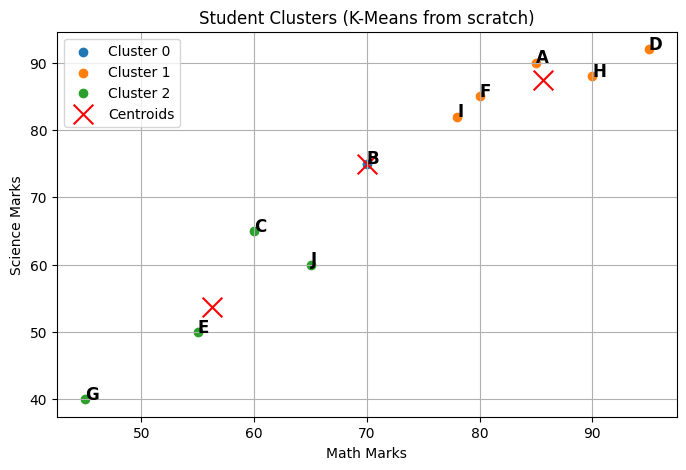

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

#Given dataset
students=['A','B','C','D','E','F','G','H','I','J']
math_marks = [85,70,60,95,55,80,45,90,78,65]
science_marks = [90,75,65,92,50,85,40,88,82,60]
english_marks = [80,85,70,96,60,88,50,86,80,72]

#Convert data into NumPy array
X=np.array(list(zip(math_marks,science_marks,english_marks)))
#print()
# K-means parameters
k=3 #Number of clusters
max_iters=100 #Maximum iterations

#Step 1: Initialize centroids randomly from data points
random.seed(42)
centroids=X[random.sample(range(len(X)),k)]

#Functions to complete Euclidean distance
def euclidean_distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))

# K-means Clustering Algorithm
for _ in range(max_iters):
  #step 2:Assign clusters
  clusters=[[] for _ in range(k)]
  print("Clusters",clusters)
  for idx, point in enumerate(X):
    distances=[euclidean_distance(point,centroid) for centroid in centroids]
    cluster_idx=np.argmin(distances)
    clusters[cluster_idx].append(idx)

  #step 3:Compute new centroids
  new_centroids=np.array([np.mean(X[cluster],axis=0) if cluster else centroids[i] for i,cluster in enumerate(clusters)])
  print("New centroids",new_centroids)

  #step 4:Check for convergence(if centroids dont change,stop)
  if np.all(centroids==new_centroids):
    break
  centroids=new_centroids    #update centroids
  print("Updated centroids",centroids)

#Assign each student (This section was empty in the original code, typically where final assignments would be stored)
student_assignments = [np.argmin([euclidean_distance(point, centroid) for centroid in centroids]) for point in X]

#Visualization
plt.figure(figsize=(8,5))
for cluster_idx,cluster in enumerate(clusters):
  cluster_points=X[cluster]
  plt.scatter(cluster_points[:,0],cluster_points[:,1],label=f"Cluster {cluster_idx}")
plt.scatter(centroids[:,0],centroids[:,1],color='red',marker='x',s=200,label="Centroids")

for i,txt in enumerate(students):
  plt.annotate(txt,(X[i,0],X[i,1]),fontsize=12,fontweight='bold')
plt.title("Student Clusters (K-Means from scratch)")
plt.xlabel("Math Marks")
plt.ylabel("Science Marks")
plt.legend()
plt.grid(True) # Added grid for clarity
plt.show()

***DESCRIPTION:***
This experiment implements the K-means clustering algorithm from scratch using NumPy on a student marks dataset. Students are grouped into 3 clusters based on their Mathematics, Science, and English scores using Euclidean distance. The algorithm iteratively updates centroids until convergence and visualizes the final cluste

**2. Write python code to implement k-means clustering using tensorflow for randomly generate 400 datapoints with 5 clusters and 3 features and also plot the graph to show the centroids and clusters.**

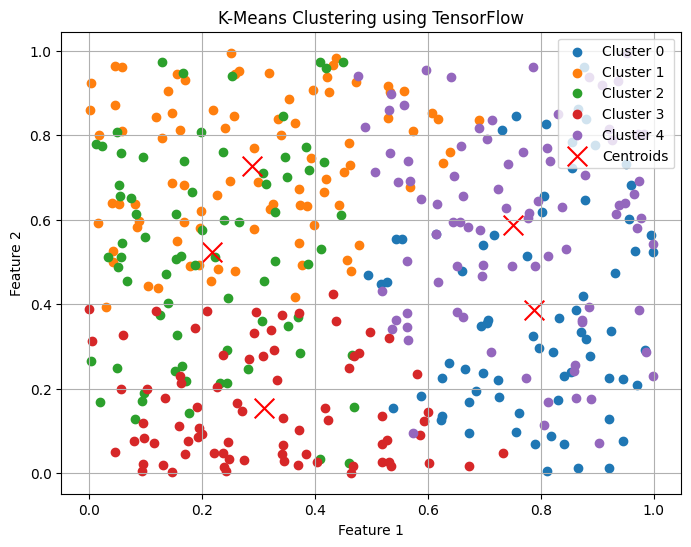

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate random data
num_points = 400
num_features = 3
k = 5   # number of clusters

X = np.random.rand(num_points, num_features).astype(np.float32)

# Step 2: Initialize centroids randomly
centroids = tf.Variable(
    X[np.random.choice(num_points, k, replace=False)],
    dtype=tf.float32
)

# Step 3: Define Euclidean distance
def euclidean_distance(a, b):
    return tf.reduce_sum(tf.square(a - b), axis=1)

# Step 4: K-means algorithm
for _ in range(100):
    # Assign clusters
    distances = tf.stack(
        [euclidean_distance(X, centroid) for centroid in centroids],
        axis=1
    )
    cluster_assignments = tf.argmin(distances, axis=1)

    # Update centroids
    new_centroids = []
    for i in range(k):
        points = tf.boolean_mask(X, cluster_assignments == i)
        new_centroids.append(tf.reduce_mean(points, axis=0))
    centroids.assign(new_centroids)

# Step 5: Plot clusters (using first two features)
plt.figure(figsize=(8,6))
for i in range(k):
    cluster_points = X[cluster_assignments.numpy() == i]
    plt.scatter(cluster_points[:,0], cluster_points[:,1], label=f"Cluster {i}")

plt.scatter(
    centroids[:,0], centroids[:,1],
    marker='x', s=200, color='red', label='Centroids'
)

plt.title("K-Means Clustering using TensorFlow")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

***DESCRIPTION:***
This experiment applies K-means clustering using TensorFlow on 400 randomly generated data points with 3 features and 5 clusters. TensorFlow operations are used for distance calculation, cluster assignment, and centroid updates. The final clusters and centroids are displayed using a scatter plot.

**3. Write a Python code to implement PCA for the given features[(4,11),(8,4),(13,5),(7,14)], also find the
mean, explained variance ratio, and projected value.**

In [ ]:
import tensorflow as tf

class PCA_TF:
  def __init__(self, n_components: int, whiten: bool = False):
    self.n_components = int(n_components)
    self.whiten = bool(whiten)

    self.mean = None  #(d,)
    self.components = None  #(k,d)  rows=PCs
    self.explained_variance = None  #(k,)
    self.explained_variance_ratio = None  #(k,)

  @staticmethod
  def standardize(X, eps=1e-8):
    mu = tf.reduce_mean(X, axis=0, keepdims=True)
    std = tf.math.reduce_std(X, axis=0, keepdims=True)
    X_s = (X - mu) / (std + eps)
    return X_s, tf.squeeze(mu, 0), tf.squeeze(std, 0)

  def fit(self, X: tf.Tensor):
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    n = tf.shape(X)[0]
    d = tf.shape(X)[1]

    # 1) mean-center
    mean = tf.reduce_mean(X, axis=0)
    Xc = X - mean

    # 2) SVD: Xc = U * diag(S) * V^T
    # V has shape (d,d):columns of V are principal directions
    s, u, v = tf.linalg.svd(Xc, full_matrices=False)  # s:(min(n,d),)

    k = tf.minimum(self.n_components, tf.shape(v)[1])
    # components as rows (k, d)
    components = tf.transpose(v[:, :k]) # (k, d)

    # 3) explained variance: eigenvalues of covariance = (s^2) / (n-1)
    # Note: covariance uses (n-1) in denominator
    explained_variance = tf.square(s[:k]) / tf.cast(n - 1, tf.float32)

    # total variance = trace(cov) = sum of all eigenvalues
    all_eigs = tf.square(s) / tf.cast(n - 1, tf.float32)
    total_var = tf.reduce_sum(all_eigs)
    explained_variance_ratio = explained_variance / (total_var + 1e-12)

    self.mean = mean
    self.components = components
    self.explained_variance = explained_variance
    self.explained_variance_ratio = explained_variance_ratio
    return self

  def transform(self, X: tf.Tensor):
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    Xc = X - self.mean
    z = tf.linalg.matmul(Xc, self.components, transpose_b=True)
    if self.whiten:
      z = z / tf.sqrt(self.explained_variance + 1e-12)
    return z

X = tf.constant([[4., 11.], [8., 4.], [13., 5.], [7., 14.]], dtype=tf.float32)
# n_components should be <= number of features (2 in this case)
pca = PCA_TF(n_components=2).fit(X)
z = pca.transform(X)

print("mean", pca.mean.numpy())
print("PCs(rows):\n", pca.components.numpy())
print("explained_variance", pca.explained_variance.numpy())
print("explained_variance_ratio", pca.explained_variance_ratio.numpy())
print("projected_values:\n", z.numpy())

mean [8.  8.5]
PCs(rows):
 [[-0.55739003  0.83025086]
 [ 0.83025086  0.55739003]]
explained_variance [30.38488    6.6151366]
explained_variance_ratio [0.82121265 0.1787874 ]
projected_values:
 [[ 4.305187  -1.9275284]
 [-3.7361288 -2.5082552]
 [-5.692828   2.200389 ]
 [ 5.1237698  2.2353945]]


**4. Explain the transformer encoder architecture in details.**


The Transformer Encoder is a fundamental building block of the Transformer model. It processes the input sequence and generates contextual representations using self-attention mechanisms instead of recurrence.

**a. Input Embedding Layer**

	•	Converts each input token into a fixed-length vector representing its semantic meaning.
	•	The encoder receives a sequence of embedding vectors, typically of dimension 512.

⸻

**b. Positional Encoding**

	•	Adds position information to embeddings so the model can understand the order of tokens.
	•	All tokens are processed in parallel.
	•	Uses sine and cosine functions of different frequencies.
	•	Positional encoding is added element-wise to input embeddings.

X_pos = X_embed + PE_pos

	•	This enables the model to handle sequences of any length.

⸻

**c. Multi-Head Self-Attention**

	•	Allows each token to attend to all other tokens in the sequence to capture global context.
	•	Multiple attention heads enable the model to focus on different aspects of the input simultaneously.
	•	Improves representation learning by capturing diverse relationships.

⸻

**d. Normalization and Residual Connection**

	•	Add & Normalize is a layer that applies a residual connection followed by layer normalization.
	•	Helps stabilize training and improves gradient flow in deep networks.

LN = gamma *{x - mu}{sqrt{sigma^2 + epsilon}} +beta

Add & Norm = LN(x + Sublayer(x))

⸻

**e. Feed Forward Network**

	•	Applies non-linear transformations independently to each token.
	•	Enhances feature representation.

FFN(x) = max(0, xW_1 + b_1)W_2 + b_2

**f. Stacked Encoder Layers(N_x)**

	• Transformer consist of stack of identical layer,basically 6 layers.
	• The encoder layer serves to transformer all input sequences into a continuous abstract representationthat encapsulate the learned info from the entire sequence.
  


**5. What is the difference between multi-head attention and masked multi-head attention?**

Multi-Head Attention
Multi-Head AttentionUsed in Transformer Encoder and Decoder
Used only in Transformer Decoder
Allows attention to all input tokens
Prevents attention to future tokens
No masking applied
Causal masking is applied
Captures global dependencies
Maintains autoregressive property
Used in models like BERT
Used in models like GP

1. Multi-Head Attention

*   List item
*   List item


2.  Multi-Head Attention



**6. What is positional encoding? Write a Python code to perform positional encoding.**

In [ ]:
# Positional Encoding from Scratch

import numpy as np
import matplotlib.pyplot as plt

def getPositionEncoding(seq_len, d, n=10000):
    p = np.zeros((seq_len, d))

    for k in range(seq_len):
        for i in range(int(d/2)):
            denominator = np.power(n, 2 * i / d)
            p[k, 2 * i] = np.sin(k / denominator)
            p[k, 2 * i + 1] = np.cos(k / denominator)

    return p

p = getPositionEncoding(seq_len=4, d=4, n=100)
print(p)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]
